In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data=pd.read_csv("dataRegression.csv")

In [7]:
data.shape

(232298, 16)

In [9]:
data.head() # shows top 5 info

,region,price,type,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,premium_house,pets_allowed,beds_per_sqfeet,baths_per_beds
0,3,7.021084,3,7.184629,1,0,0,0,1,0,33.3755,-86.8045,0,1,-6.086017,-0.405465
1,3,6.715383,3,7.032624,1,0,0,0,1,1,33.4226,-86.7065,0,1,-7.032624,0.693147
2,3,6.684612,3,6.831954,1,0,0,0,1,1,33.4226,-86.7065,0,1,-6.831954,0.000000
3,3,6.665684,3,6.953684,1,0,0,0,1,1,33.4226,-86.7065,0,1,-6.260537,-0.693147
4,3,6.802395,3,7.168580,1,0,0,0,1,1,33.4226,-86.7065,1,1,-6.475433,0.000000


In [11]:
X_train, X_test, y_train, y_test = train_test_split( 
#  X are input attributes, is capital because it's a vector,
# y are target information we want to predict (price), is lowercase because value  
    data.drop("price",axis=1), # hides the current "price" column and removes it
    data["price"], # put down new "price" column because this is what we want to predict
    test_size=0.25, # only choosing 25% of data to be testing, good form of practice
    random_state=0
)

# What is the deliverable from this? 

In [12]:
lm1 = LinearRegression() 
lm1.fit(X_train,y_train)

LinearRegression()

In [13]:
lm1_pred = lm1.predict(X_test)

In [ ]:
print("Linear Regression Performance")
print("MAE", metrics.mean_absolute_error(y_test,lm1_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,lm1_pred)))
print("R2_score:",metrics.r2_score())

In [14]:
pred = pd.DataFrame(data={"Predicted_Rent":np.exp(lm1_pred),"Actual_Rent":np.exp(y_test)})
pred

,Predicted_Rent,Actual_Rent
195855,967.751835,1025.0
175725,1078.298863,1050.0
94751,1143.335850,399.0
180883,1025.371272,708.0
26057,1392.938742,1825.0
...,...,...
115642,1071.229590,645.0
165159,761.583111,675.0
152673,665.406571,2100.0
72157,959.628218,1100.0


KeyError: 'Actual Rent'

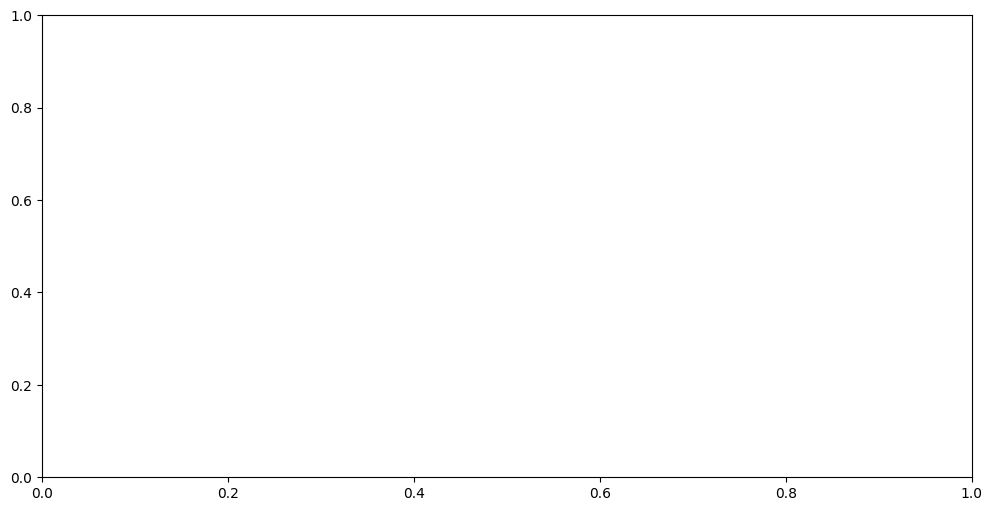

In [20]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred["Actual Rent"], pred["Predicted Rent"],color="tab:cyan",marker=".",label="Predicted",alpha=0.5)

ax1.scatter(pred["Actual Rent"], pred["Predicted Rent"], s=10, color="tab:orange",marker="s",label="Actual")

/var/folders/hd/1hvfjm_11r70xv174w4my_hw0000gn/T/ipykernel_33571/3227502516.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


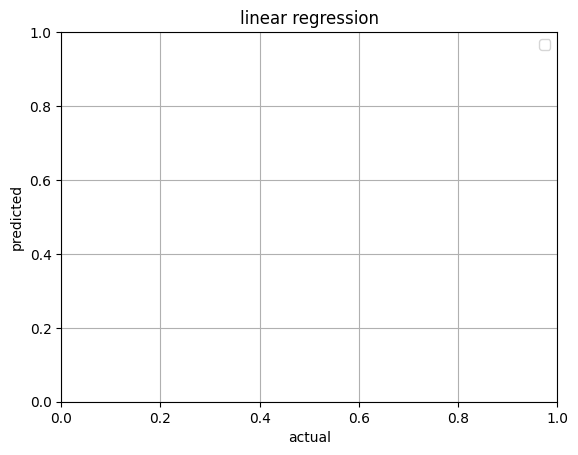

In [21]:
plt.xlabel("actual")
plt.ylabel("predicted")
plt.legend()
plt.title("linear regression")
plt.grid()
plt.show()

In [22]:
rf1 = tree.DecisionTreeRegressor()
rf1.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
rf1_pred = rf1.predict(X_test)
pred = pd.DataFrame(data={"Predicted_Rent":np.exp(lm1_pred),"Actual_Rent":np.exp(y_test)})
pred

,Predicted_Rent,Actual_Rent
195855,967.751835,1025.0
175725,1078.298863,1050.0
94751,1143.335850,399.0
180883,1025.371272,708.0
26057,1392.938742,1825.0
...,...,...
115642,1071.229590,645.0
165159,761.583111,675.0
152673,665.406571,2100.0
72157,959.628218,1100.0


In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
df["target"] = iris.target # creates a target column, which is what we want to predict
# what is the default function of target??
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [34]:
species = []
for i in range(len(df["target"])): # for the number in range from the min number of df target value and max number of of df target value
    if df["target"][i] == 0: # so if it equals 0
        species.append("setosa")
    elif df["target"][i] == 1:
        species.append("versicolor")
    else: 
        species.append("virginica")

df["species"] = species # adds the list species to become a column 'species' in the df table it's like reading from right to left on this

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [38]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [43]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2



In [44]:
# features refer to the columns at zero-index
fig = plt.figure(gifsize=(25,20))
_ = tree.plot_tree(clf,feature_names=iris.feature_names,class_names=["setosa","versicolor","virginica"],filled=True,)

fig.show()

AttributeError: Figure.set() got an unexpected keyword argument 'gifsize'